## MinK++ Plotting

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [125]:
source = 'results/minkpp/'
metric = 'mink++_0.1'

In [126]:
# Function to remove outliers based on the 2.5th and 97.5th percentiles
def remove_outliers(df, column_name):
    lower_quantile = df[column_name].quantile(0.025)
    upper_quantile = df[column_name].quantile(0.975)
    return df[(df[column_name] >= lower_quantile) & (df[column_name] <= upper_quantile)]

In [127]:
dataframes = []

for subfolder in os.listdir(source):
  subfolder_path = os.path.join(source, subfolder)
  if os.path.isdir(subfolder_path):  # Check if it's a directory
    for sub_subfolder in os.listdir(subfolder_path):
      sub_subfolder_path = os.path.join(subfolder_path, sub_subfolder)
      if os.path.isdir(sub_subfolder_path):  # Check if it's a directory
        csv_file_path = os.path.join(sub_subfolder_path, "df.csv")
        if os.path.exists(csv_file_path):  # Check if df.csv exists
          # Load the CSV into a DataFrame
          df = pd.read_csv(csv_file_path)
          df['Dataset'] = sub_subfolder
          df['Model'] = subfolder

          df = remove_outliers(df, metric)
          
          dataframes.append(df)
          print(f"Loaded DataFrame from: {csv_file_path}")
        else:
          print(f"No df.csv found in: {sub_subfolder_path}")

Loaded DataFrame from: results/minkpp/OLMo_7b/anli/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/scitail/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/paws/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/snli/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/wnli/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/hans/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/mnli/df.csv
Loaded DataFrame from: results/minkpp/OLMo_7b/rte/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/anli/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/scitail/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/paws/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/snli/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/wnli/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/hans/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/mnli/df.csv
Loaded DataFrame from: results/minkpp/OPT_2.7b/rte/df.csv
Loaded DataFrame from: results/minkpp/OLMo_1b/anli/df.csv
Lo

In [128]:
# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Prepare the data for the violin plot
datasets = combined_df['Dataset'].unique()
models = combined_df['Model'].unique()

# Create a dictionary to hold data for each dataset and model
violin_data = []
dataset_positions = []
colors = plt.cm.tab10.colors  # Use a colormap for different model colors
model_color_map = {model: colors[i % len(colors)] for i, model in enumerate(models)}

current_position = 1
position_labels = []
position_models = []
for dataset in datasets:
    model_positions = []
    for model in models:
        subset = combined_df[(combined_df['Dataset'] == dataset) & (combined_df['Model'] == model)]
        if not subset.empty:
            violin_data.append(subset[metric].values)
            model_positions.append(current_position)
            position_models.append(current_position)
            current_position += 1
    # Calculate the midpoint of the model positions for the dataset
    if model_positions:
        dataset_positions.append(sum(model_positions) / len(model_positions))
        position_labels.append(dataset)
    current_position += 2

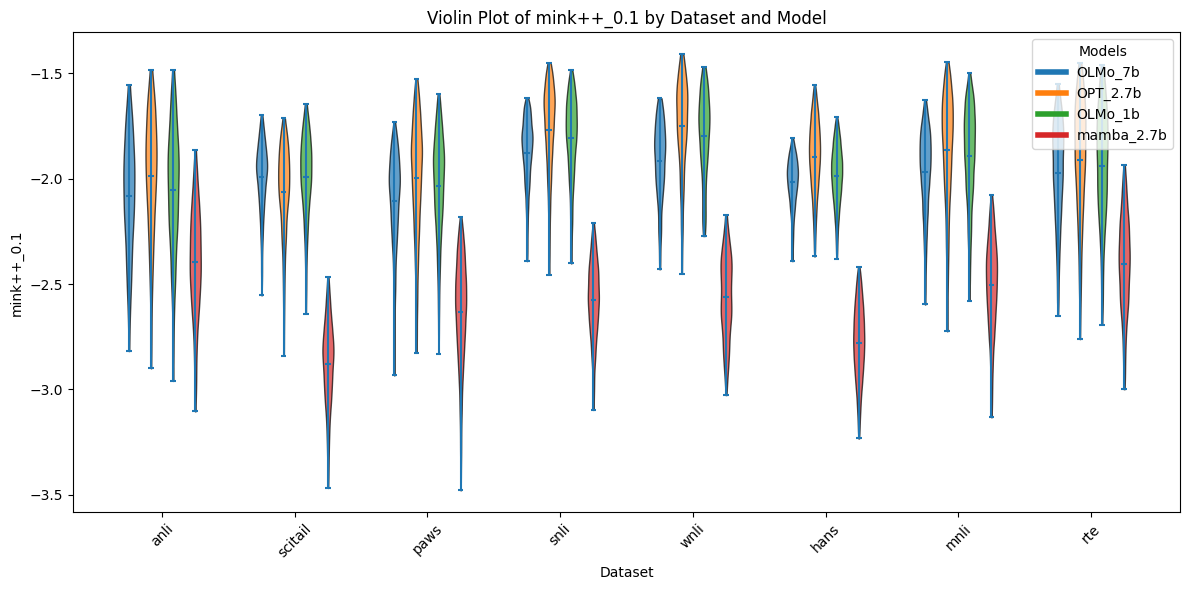

In [129]:
# Create the violin plot
plt.figure(figsize=(12, 6))
violin_parts = plt.violinplot(violin_data, positions=position_models, showmeans=True)

# Add colors to the violins
for i, pc in enumerate(violin_parts['bodies']):
    model = models[i % len(models)]  # Cycle through models
    pc.set_facecolor(model_color_map[model])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Customize the X-axis
plt.xticks(ticks=dataset_positions, labels=position_labels, rotation=45)
plt.xlabel("Dataset")
plt.ylabel(f"{metric}")
plt.title(f"Violin Plot of {metric} by Dataset and Model")

# Add a legend for the models
handles = [plt.Line2D([0], [0], color=model_color_map[model], lw=4, label=model) for model in models]
plt.legend(handles=handles, title="Models", loc="upper right")

plt.tight_layout()
plt.show()